In [241]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

import math

In [242]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, RidgeCV

In [243]:
#receives a trained model

def metrics_f(model , X_train ,X_test, y_train,y_test):
    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the evaluation metrics
    print("Train MSE:", train_mse)
    print("Test MSE:", test_mse)
    print("Train RMSE:", train_rmse)
    print("Test RMSE:", test_rmse)
    print("Train MAE:", train_mae)
    print("Test MAE:", test_mae)
    print("Train R2:", train_r2)
    print("Test R2:", test_r2)



In [244]:
#receives a trained model

def residual_plot(model , X_train ,X_test, y_train,y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate mean squared error on the training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Print the mean squared error
    print("Train MSE:", train_mse)
    print("Test MSE:", test_mse)

    # Create a residual plot
    train_residuals = y_train_pred - y_train
    test_residuals = y_test_pred - y_test
    print(test_residuals)
    fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

    plt.scatter(y_train_pred, train_residuals, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, test_residuals, c='green', marker='s', label='Testing data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=0, xmax=500, lw=2, color='red')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

    sns.histplot(test_residuals, kde = True)


In [257]:
df = pd.read_csv('booking_data_clean.csv')
df = df.drop(['Unnamed: 0'], axis=1)

array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'TTT'}>,
        <AxesSubplot:title={'center':'LOS'}>],
       [<AxesSubplot:title={'center':'Grade'}>,
        <AxesSubplot:title={'center':'Num of Reviews'}>,
        <AxesSubplot:title={'center':'Curr Price'}>],
       [<AxesSubplot:title={'center':'Original Price'}>,
        <AxesSubplot:title={'center':'Distance from center'}>,
        <AxesSubplot:title={'center':'Location grade'}>]], dtype=object)

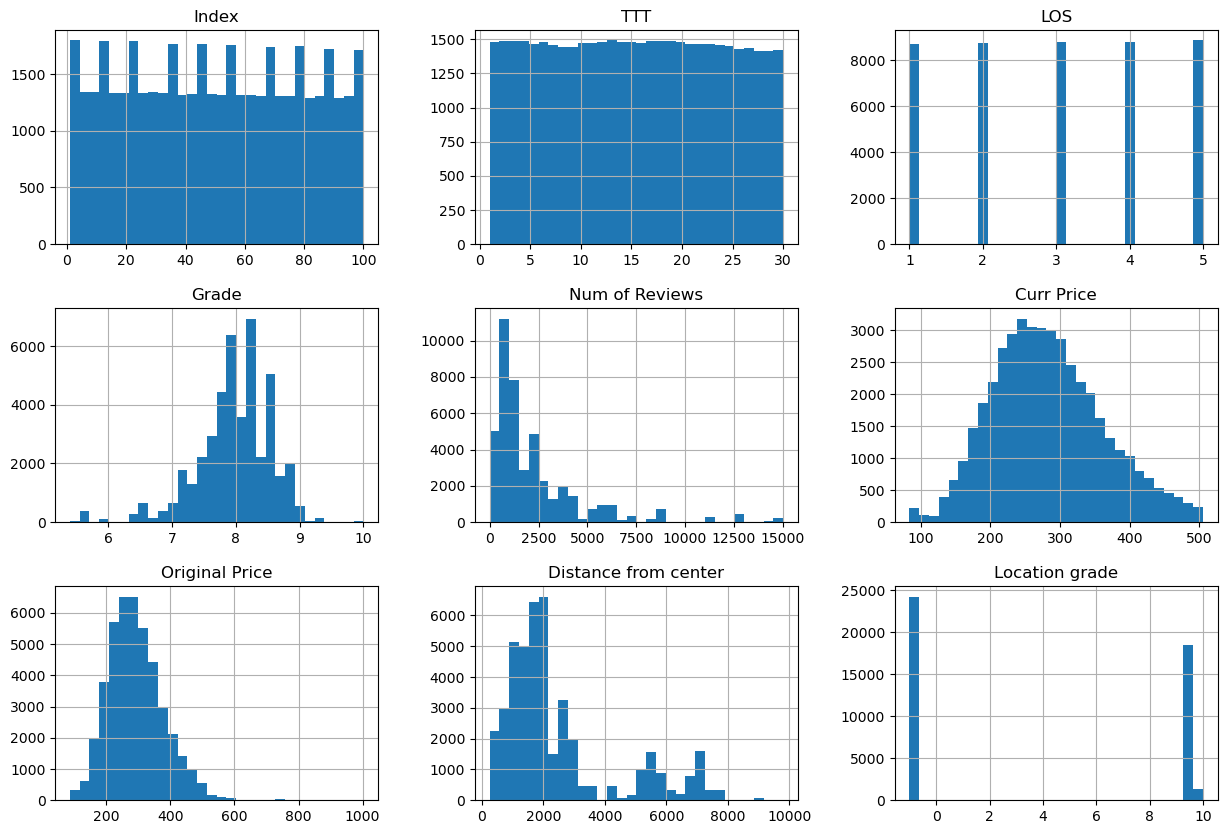

In [246]:
df.hist(bins=30, figsize=(15, 10))

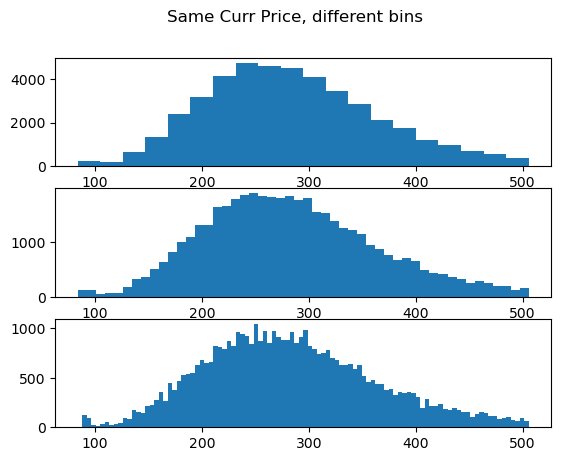

In [247]:
fig, axs = plt.subplots(3)
fig.suptitle('Same Curr Price, different bins')
axs[0].hist(df['Curr Price'], bins = 20)
axs[1].hist(df['Curr Price'], bins = 50)
axs[2].hist(df['Curr Price'], bins = 100)
plt.show()

                         Index       TTT       LOS     Grade  Num of Reviews  \
Index                 1.000000 -0.004640  0.002241 -0.109071       -0.219417   
TTT                  -0.004640  1.000000  0.003866  0.014134       -0.025680   
LOS                   0.002241  0.003866  1.000000  0.007802       -0.007596   
Grade                -0.109071  0.014134  0.007802  1.000000       -0.184542   
Num of Reviews       -0.219417 -0.025680 -0.007596 -0.184542        1.000000   
Curr Price            0.090454  0.221870  0.027197  0.389415       -0.182564   
Original Price        0.065747  0.200217  0.060618  0.330783       -0.156239   
Distance from center  0.098965  0.013152  0.016610  0.051518       -0.233235   
Location grade       -0.158036  0.007791 -0.022888  0.385635        0.100159   
Free Cancellation    -0.128126  0.286687  0.051347  0.000636        0.005435   
No prepayment needed -0.114775  0.164588  0.059138  0.015707        0.113857   
Breakfast included   -0.040516  0.018372

<AxesSubplot:>

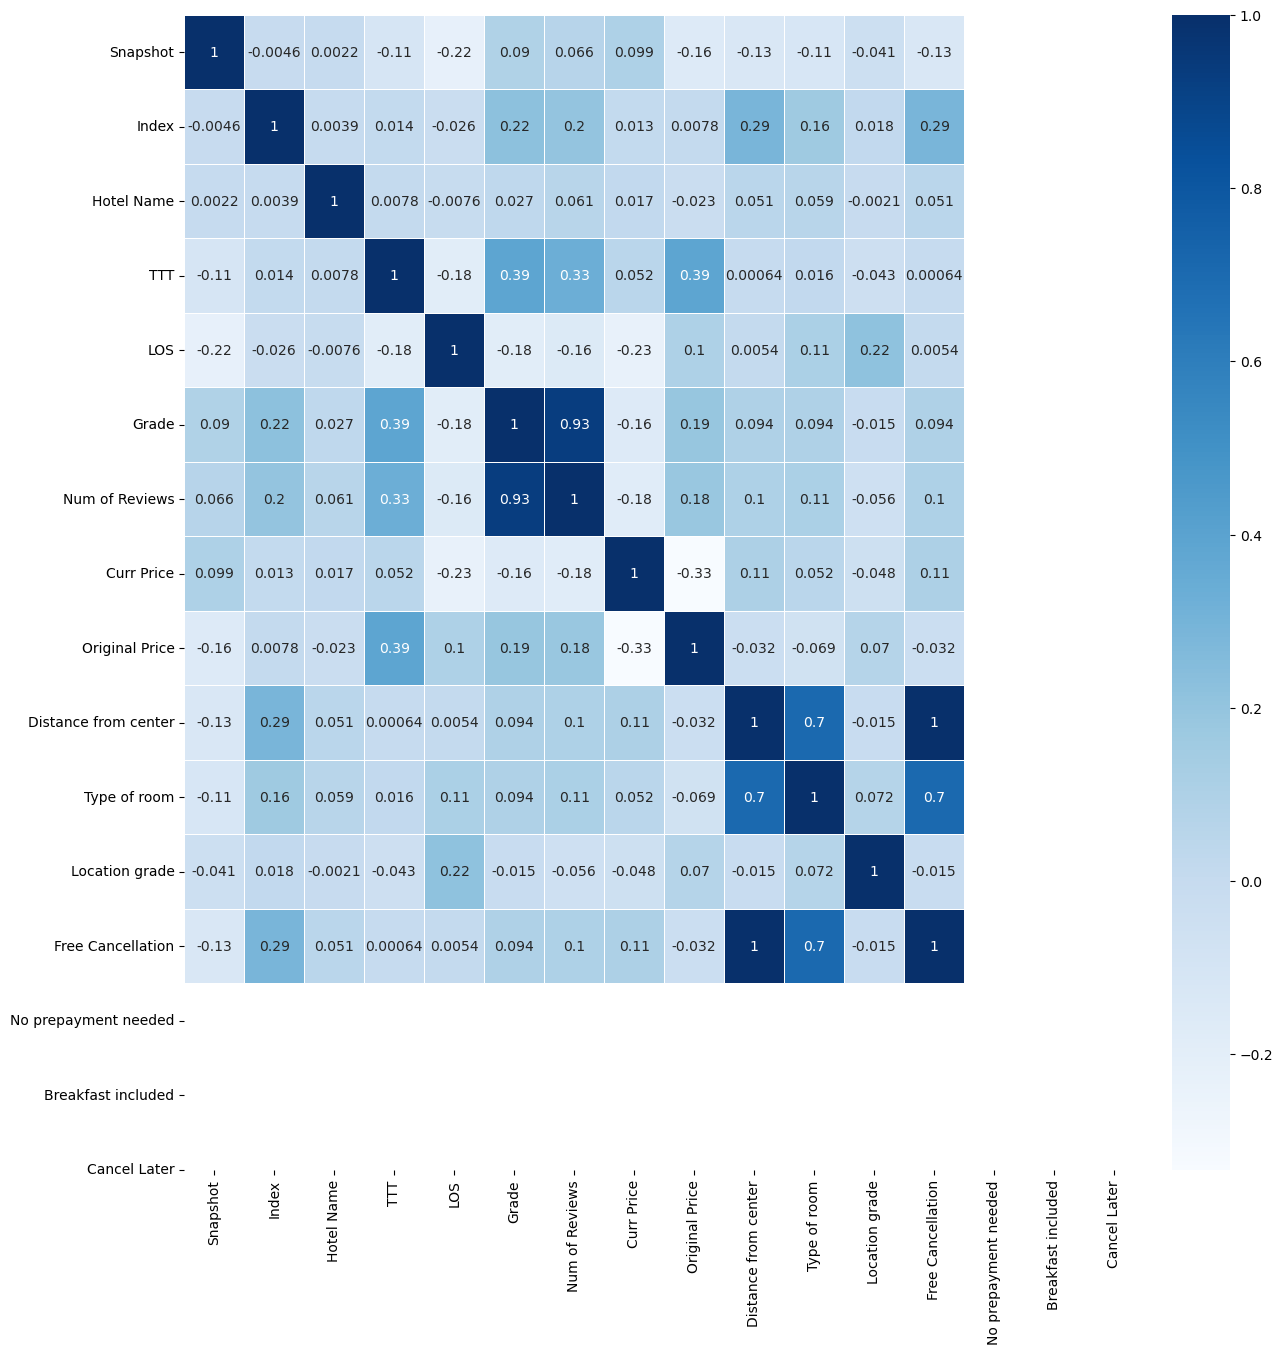

In [248]:
#sns.heatmap(df.corr(), xticklabels=df.columns, yticklabels=df.columns,  cmap="Blues", annot=True)
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
print(df.corr())
sns.heatmap(df.corr(), xticklabels=df.columns, yticklabels=df.columns,  cmap="Blues", annot=True, linewidths=.5, ax=ax)
#ax = sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5)


#### נבחן קשרים פנימיים בין המשתנים אשר יש להם קורלציה חזקה למחיר:

<AxesSubplot:>

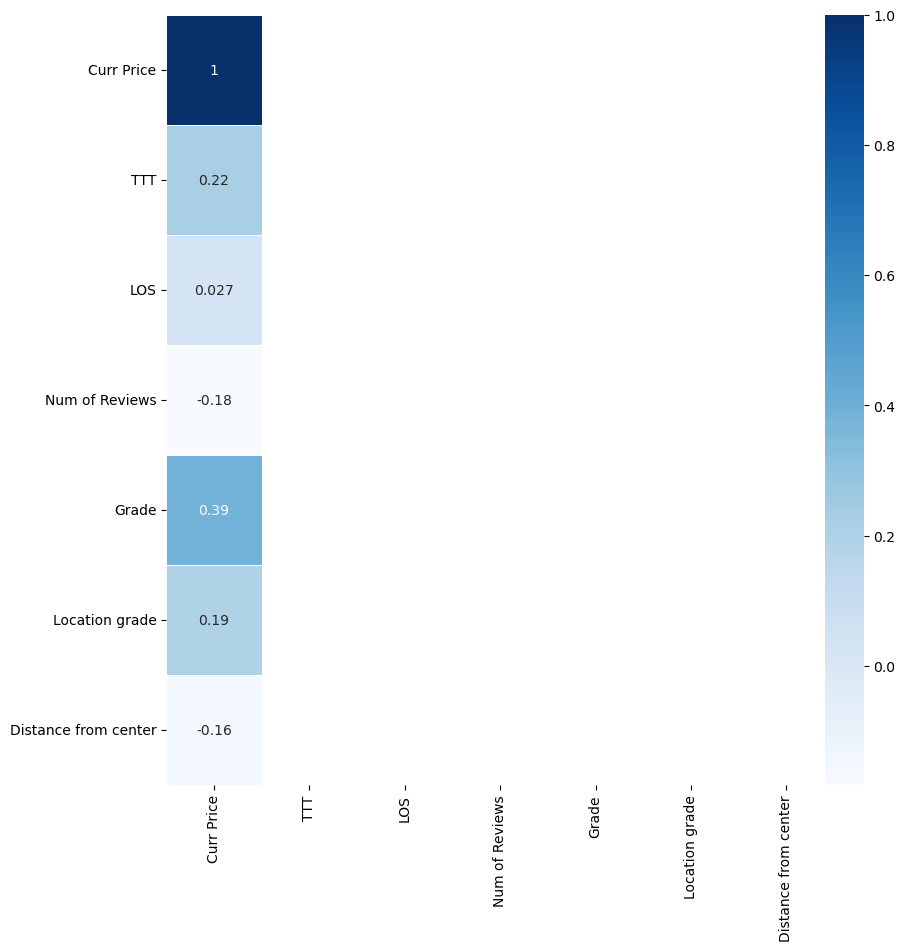

In [259]:
inner_corr_df = df[['Curr Price', 'TTT', 'LOS', 'Num of Reviews', 'Grade', 'Location grade', 'Distance from center']]
inner_corr_df.corr()[['Curr Price']]


fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(inner_corr_df.corr()[['Curr Price']], xticklabels=inner_corr_df.columns, yticklabels=inner_corr_df.columns,  cmap="Blues", annot=True, linewidths=.5, ax=ax)

In [255]:
df = df[df['Location grade'] != -1]
#df = df[df['Grade'] > 6]
#df = df[df['Grade'] <= 9]
df = df[df['Distance from center'] <= 4000]
df = df[df['Num of Reviews'] < 5000]

<AxesSubplot:>

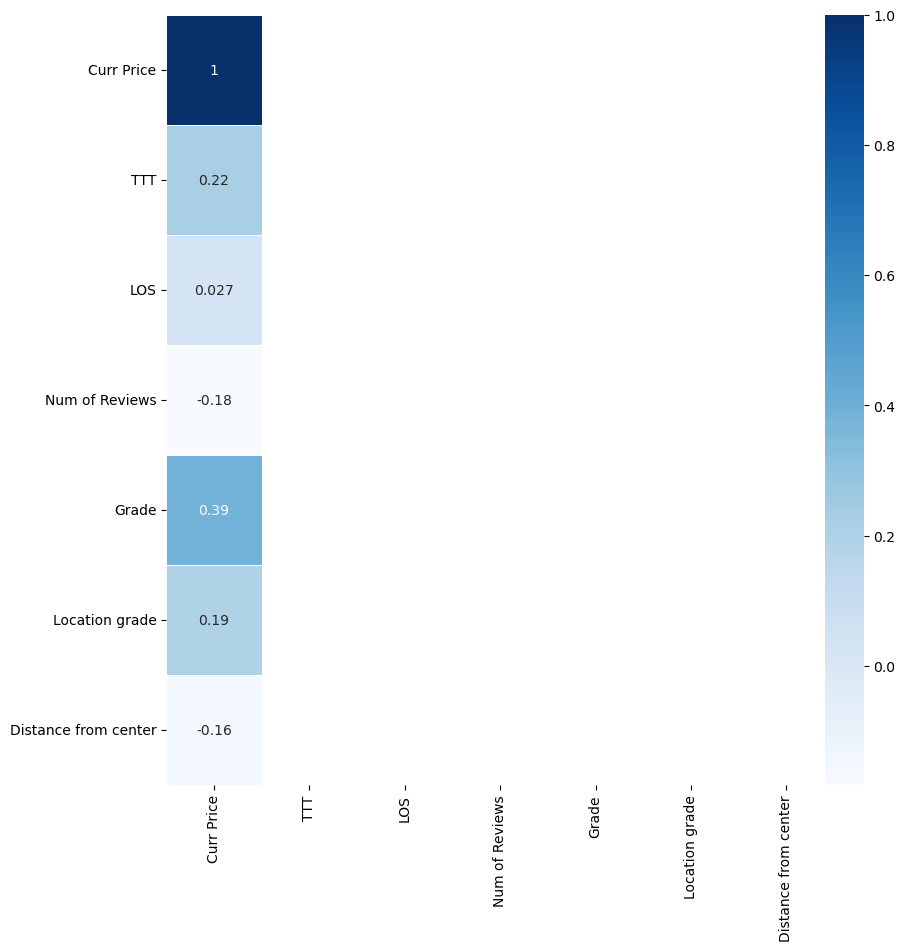

In [258]:
inner_corr_df = df[['Curr Price', 'TTT', 'LOS', 'Num of Reviews', 'Grade', 'Location grade', 'Distance from center']]
inner_corr_df.corr()[['Curr Price']]


fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(inner_corr_df.corr()[['Curr Price']], xticklabels=inner_corr_df.columns, yticklabels=inner_corr_df.columns,  cmap="Blues", annot=True, linewidths=.5, ax=ax)

#### ניתן לראות כי אין קשר חזק בין המשתנים (לכל היותר -0.18), ולכן ניתן להתייחס לכולם במודל. נשתמש ברגרסיה ליניארית על כולם אל מול המחיר:

[ 1.81005503e+00  3.62600912e+00 -1.89912263e-03  7.11507654e+01
 -1.45582890e+00 -2.21533246e-02]
Train MSE: 4927.053946120539
Test MSE: 4874.492635802056
Train RMSE: 70.19297647286756
Test RMSE: 69.81756681381883
Train MAE: 55.59848793497614
Test MAE: 55.07269926037707
Train R2: 0.201142324411832
Test R2: 0.208451073254603
Train MSE: 4927.053946120539
Test MSE: 4874.492635802056
10906    -27.085337
42082     81.965306
43857     55.133897
6635      75.410412
43904     10.432896
            ...    
34574    -85.966699
31101   -114.095387
8439     -12.814346
4388      -4.159167
24134     57.742771
Name: Curr Price, Length: 3869, dtype: float64


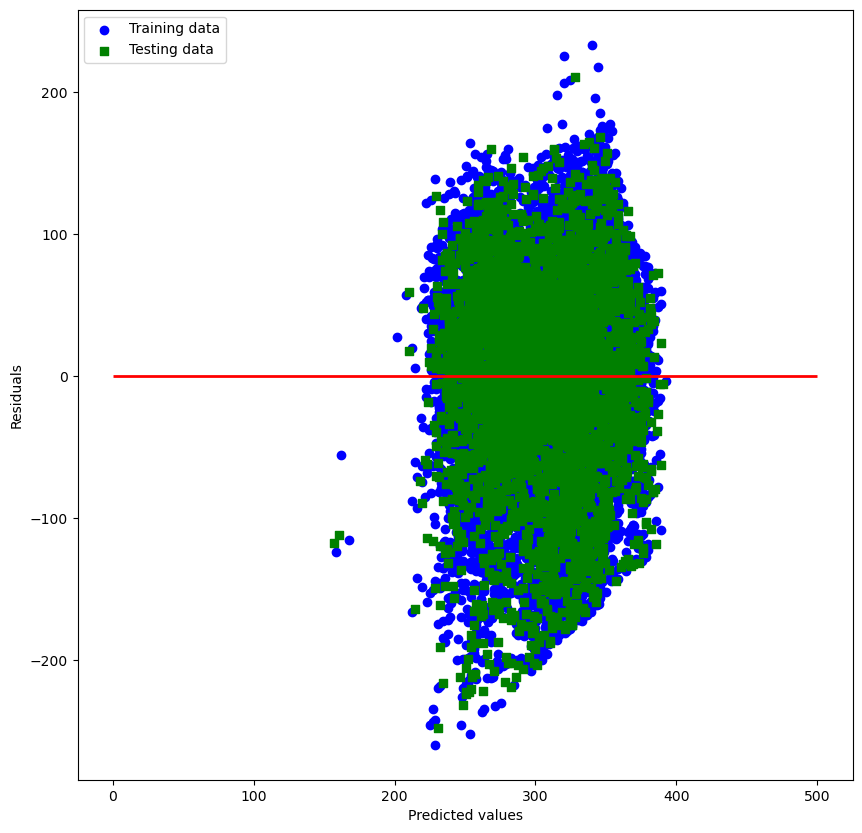

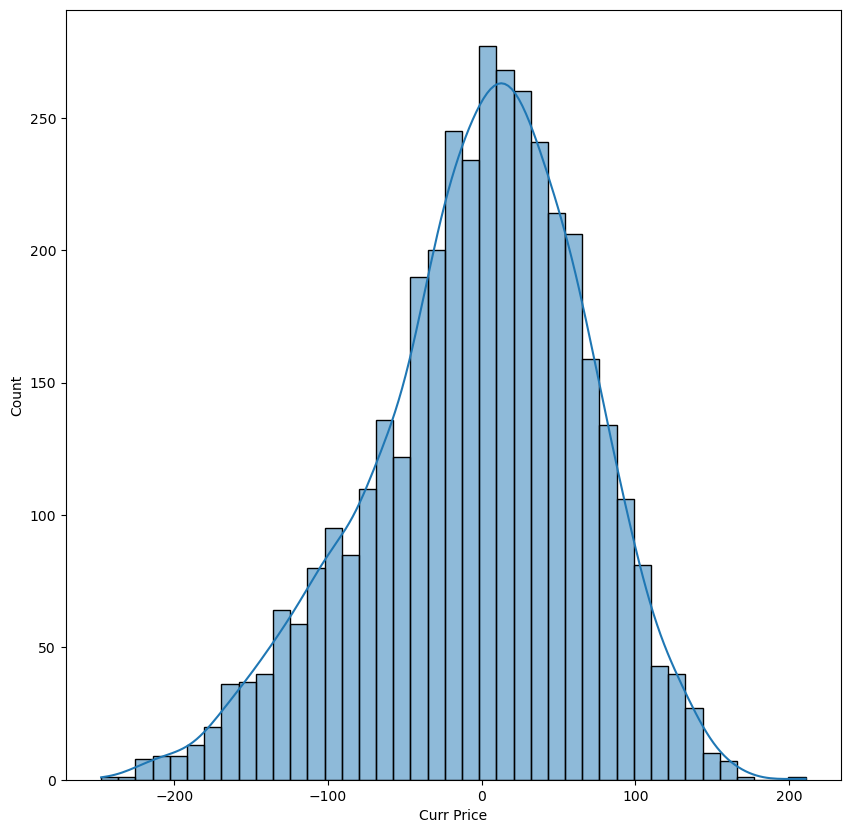

In [226]:
independent_vars = list(inner_corr_df.columns)
X = df[independent_vars]  
y = df['Curr Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)
lreg = LinearRegression()
lreg.fit(X_train,y_train)

print(lreg.coef_)

metrics_f(lreg , X_train ,X_test, y_train,y_test)
residual_plot(lreg , X_train ,X_test, y_train,y_test)

#### ננסה לנרמל ואז לשלב את המשתנים שעכשיו הצבנו במודל ולהפוך אותם למדד אחד שיוכל לחזות את המחיר בצורה טובה יותר

In [96]:
from sklearn import preprocessing

x = inner_corr_df[['TTT', 'Grade', 'Num of Reviews']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_res = pd.DataFrame(x_scaled)
df_res['average'] = df_res.mean(numeric_only=True, axis=1)


In [102]:
X = np.vstack([df_res['average'],np.ones(len(df[var]))]).T  
y = df['Curr Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)
lreg = LinearRegression()
lreg.fit(X_train,y_train)
print('coef: ', lreg.coef_[0])
print('intercept: ', lreg.intercept_)

fig, ax = plt.subplots(figsize=(10,10)) 

pred_test = lreg.predict(X_test)
print(np.corrcoef(y_test, pred_test))
plt.scatter(y_test, pred_test)

fig, ax = plt.subplots(figsize=(10,10))

residuals = pred_test - y_test
sns.histplot(residuals, bins = 20, kde = True)
plt.show()

Train MSE: 4995.141725107209
Test MSE: 4905.8392744617195
Train RMSE: 70.6763165785202
Test RMSE: 70.04169668463007
Train MAE: 55.96165604850058
Test MAE: 55.513805878471814
Train R2: 0.21072449378231972
Test R2: 0.20995146658242747


count    43955.000000
mean       283.065850
std         79.366937
min         83.876812
25%        225.815016
50%        276.234300
75%        333.410326
max        505.637379
Name: Curr Price, dtype: float64

Train MSE: 4995.141725107209
Test MSE: 4905.8392744617195


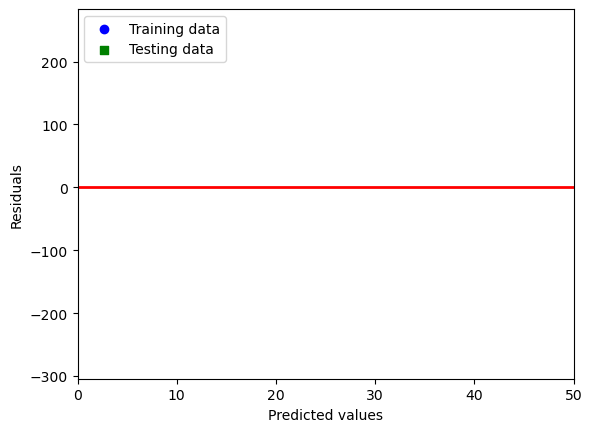